Midsem Project Evaluation (BaseLine Model) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

c:\Users\harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
torch.cuda.is_available()

True

Data Extraction

In [3]:
df_hindi1 = pd.read_csv("uli_dataset/training/train_hi_l1.csv")
df_hindi2 = pd.read_csv("uli_dataset/training/train_hi_l2.csv")
df_english1 = pd.read_csv("uli_dataset/training/train_en_l1.csv")
df_english2 = pd.read_csv("uli_dataset/training/train_en_l2.csv")
df_tamil1 = pd.read_csv("uli_dataset/training/train_ta_l1.csv")
df_tamil2 = pd.read_csv("uli_dataset/training/train_ta_l2.csv")

In [4]:
df_hindi1_test = pd.read_csv("uli_dataset/testing/test_hi_l1.csv")
df_hindi2_test = pd.read_csv("uli_dataset/testing/test_hi_l2.csv")

In [5]:

df_english1_test = pd.read_csv("uli_dataset/testing/test_en_l1.csv")
df_english2_test = pd.read_csv("uli_dataset/testing/test_en_l2.csv")
df_tamil1_test = pd.read_csv("uli_dataset/testing/test_ta_l1.csv")
df_tamil2_test = pd.read_csv("uli_dataset/testing/test_ta_l2.csv")

In [6]:
df_hindi1_test.head()

,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN


In [21]:
def mergeDF(df1, df2):
    arr = df1.columns.values
    hi_dict = {}
    for i in range(len(df1)):
        count1 = 0
        count0 = 0
        for j in range(len(arr)-2):
            if (df1[arr[2+j]][i] == '1.0'):
                count1 += 1
            elif (df1[arr[2+j]][i] == '0.0'):
                count0 += 1
                
        if (count1 > count0):
            hi_dict[df1['text'][i]] = 1
        elif (count0 > count1):
            hi_dict[df1['text'][i]] = 0

    for i in range(len(df2)):
        count1 = 0
        count0 = 0
        for j in range(len(arr)-2):
            if (df2[arr[2+j]][i] == '1.0'):
                count1 += 1
            elif (df2[arr[2+j]][i] == '0.0'):
                count0 += 1
        if (count1 > count0):
            hi_dict[df2['text'][i]] = 1
        elif (count0 > count1 and (df2['text'][i] not in hi_dict)):
            hi_dict[df2['text'][i]] = 0
    df = pd.DataFrame(list(hi_dict.items()), columns=["Text", "Label"])
    return df

In [22]:
df_hindi = mergeDF(df_hindi1,df_hindi2)
df_tamil = mergeDF(df_tamil1,df_tamil2)
df_english = mergeDF(df_english1,df_english2)


In [23]:
df_tamil1_test.head()

,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN


In [24]:
df_hindi_test = mergeDF(df_hindi1_test,df_hindi2_test)
df_tamil_test = mergeDF(df_tamil1_test,df_tamil2_test)
df_english_test = mergeDF(df_english1_test,df_english2_test)

In [25]:
df_tamil_test.head()

,Text,Label


EDA

In [26]:
df_hindi.head()

,Text,Label
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,1
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1


In [27]:
df_english.head()

,Text,Label
0,"If this is ""grilling"" then wht wud u call t...",1
1,"""In America, where the genuine Englishman no l...",0
2,"""In the earlier decades the rallying cry of th...",0
3,"""blank is blank culture/experience"" me litera...",0
4,"""cannot even burn the effigy"" LMAO 😂😂😂😂",0


In [28]:
df_tamil.head()

,Text,Label
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,0
1,பத்தினி வேச பு.. வேற எடத்துல காட்டு இங்குட்ட...,1
2,"""ஆடு திருடுனதுக்கு எப்பிடியும் தண்டனை கிடைச்சி...",0
3,"""ஊரடங்கால் 100 கோடிக்கு மேல் இழப்பு"" - சதீஷ், ...",0
4,"""கூறை ஏறி கோழி பிடிக்க முடியாதவன் வானம் ஏறி வை...",0


In [13]:
df_hindi_test.head()

,Text,Label


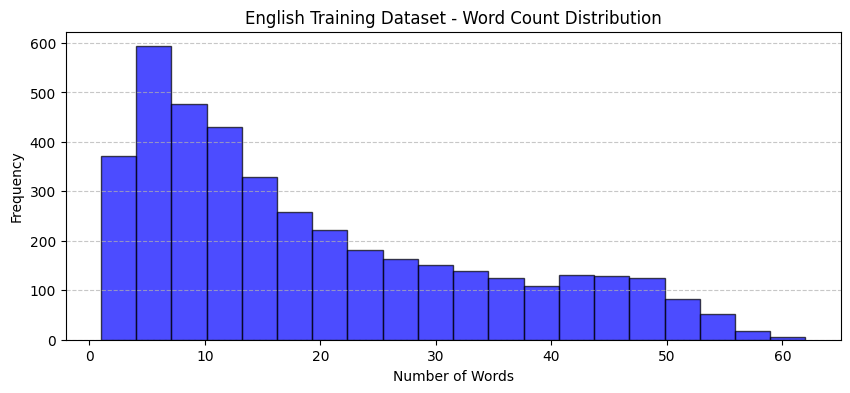

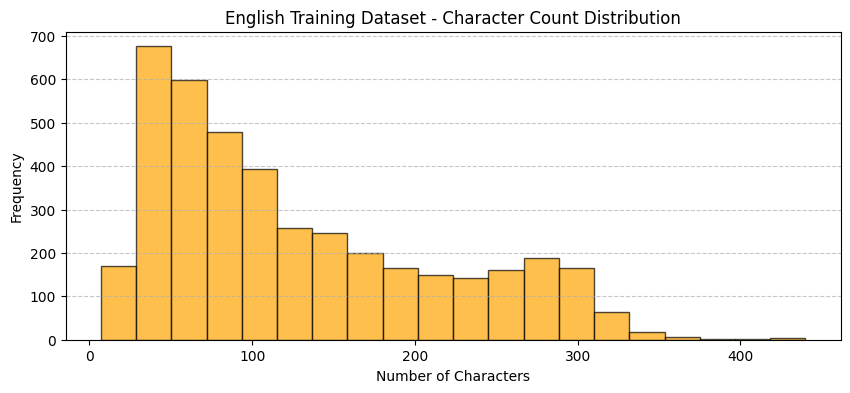

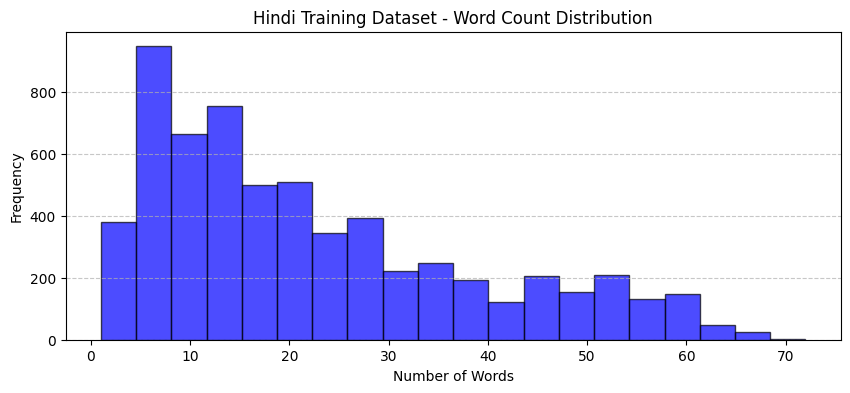

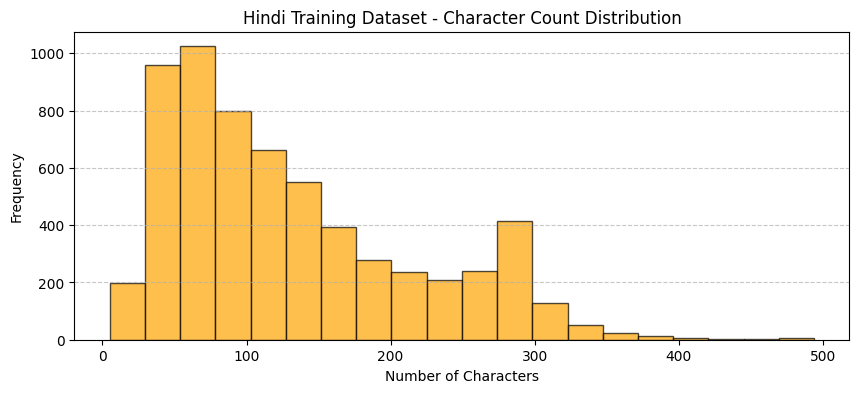

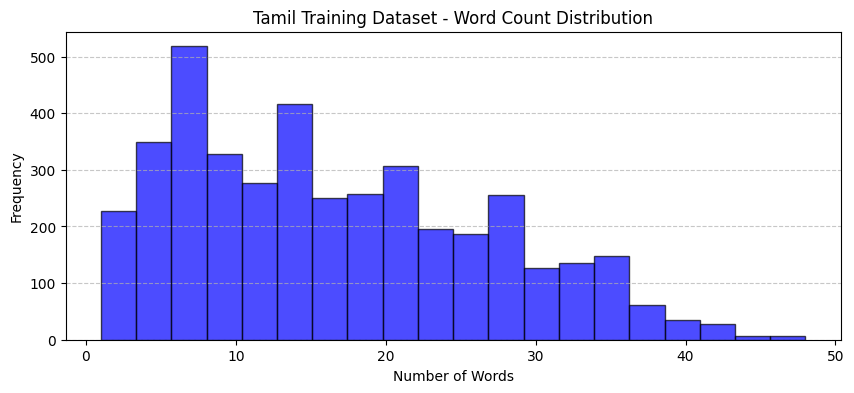

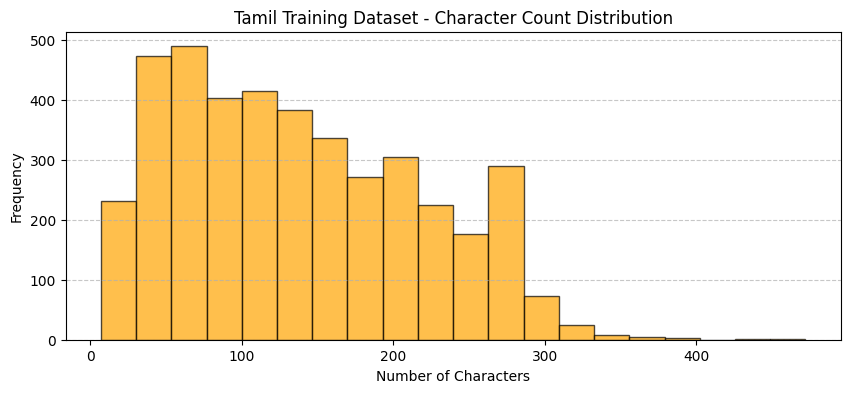

In [13]:
import matplotlib.pyplot as plt

# Define a dictionary with language names and their DataFrames
dfs = {'English': df_english, 'Hindi': df_hindi, 'Tamil': df_tamil}

for lang, df in dfs.items():
    df = df.copy()  # Ensure modifications don't affect the original DataFrame

    # Calculate word and character counts
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['Text'].apply(lambda x: len(str(x)))

    # Plot Word Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"{lang} Training Dataset - Word Count Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot Character Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['char_count'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"{lang} Training Dataset - Character Count Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



English Dataset: 4088 samples
Label
0    3124
1     964
Name: count, dtype: int64

Hindi Dataset: 6195 samples
Label
1    3392
0    2803
Name: count, dtype: int64

Tamil Dataset: 4114 samples
Label
1    2724
0    1390
Name: count, dtype: int64


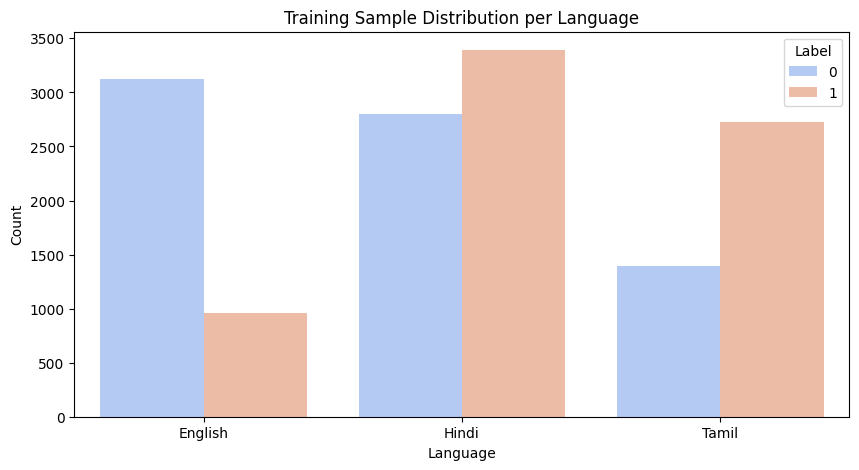

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary with language names and DataFrames
dfs = {'English': df_english, 'Hindi': df_hindi, 'Tamil': df_tamil}

# Count total samples per language and label distribution
for lang, df in dfs.items():
    print(f"\n{lang} Dataset: {len(df)} samples")
    print(df['Label'].value_counts())

# Concatenating all DataFrames using pd.concat()
df_all = pd.concat([
    df_english.assign(Language='English'),
    df_hindi.assign(Language='Hindi'),
    df_tamil.assign(Language='Tamil')
])

# Plot Label Distribution per Language
plt.figure(figsize=(10, 5))
sns.countplot(x="Language", hue="Label", data=df_all, palette="coolwarm")
plt.title("Training Sample Distribution per Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()


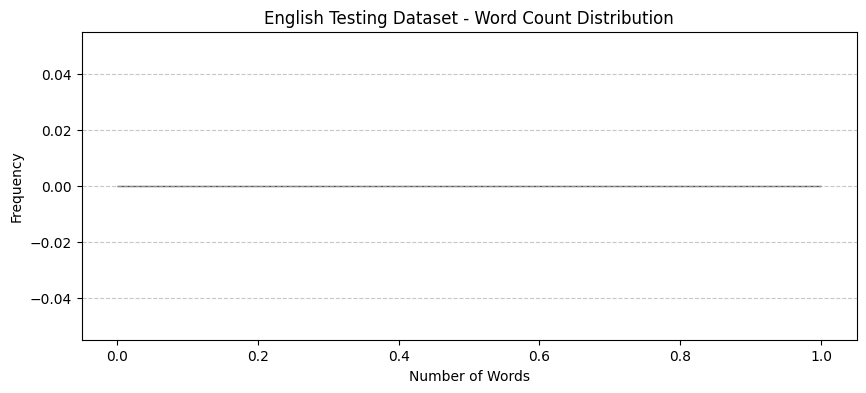

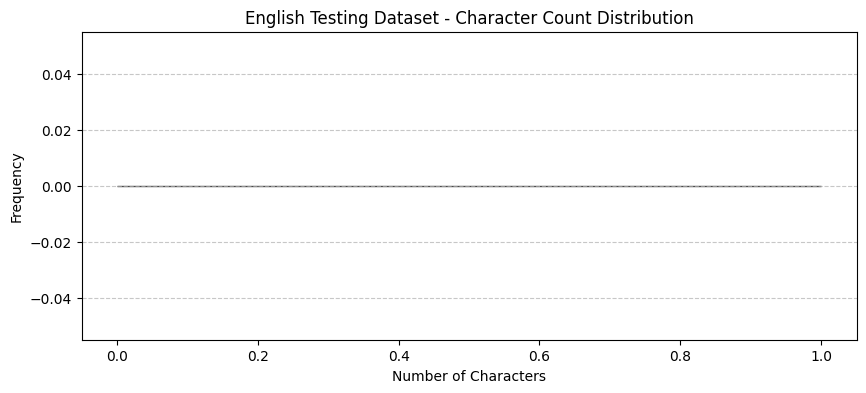

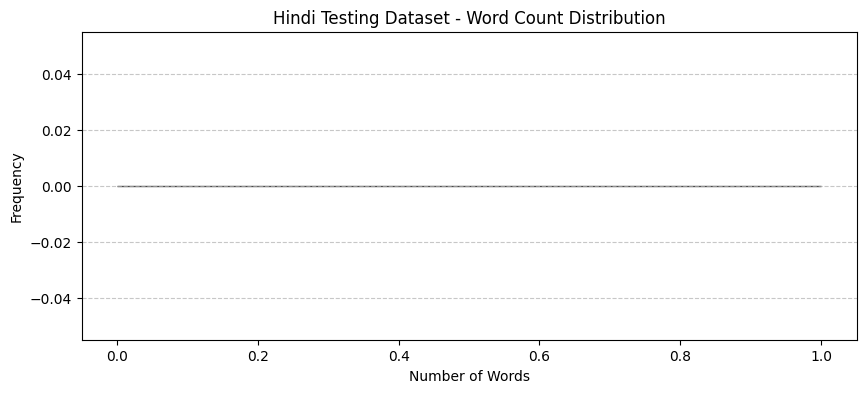

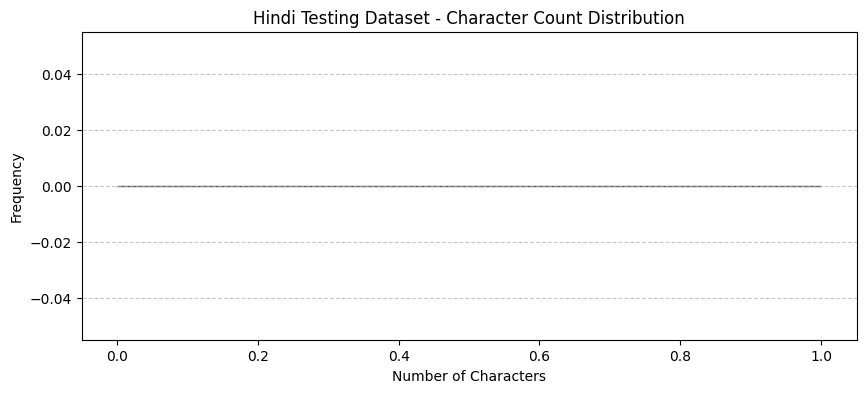

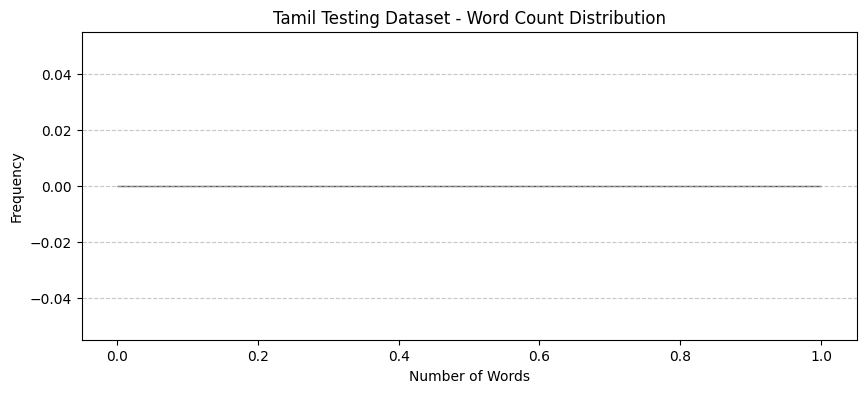

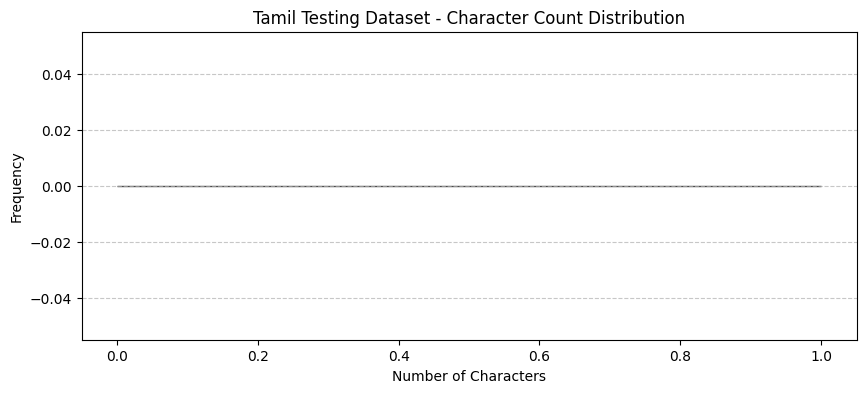

In [15]:
import matplotlib.pyplot as plt

# Define a dictionary with language names and their DataFrames
dfs = {'English': df_english_test, 'Hindi': df_hindi_test, 'Tamil': df_tamil_test}

for lang, df in dfs.items():
    df = df.copy()  # Ensure modifications don't affect the original DataFrame

    # Calculate word and character counts
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['Text'].apply(lambda x: len(str(x)))

    # Plot Word Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"{lang} Testing Dataset - Word Count Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot Character Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['char_count'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"{lang} Testing Dataset - Character Count Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



English Dataset: 0 samples
Series([], Name: count, dtype: int64)

Hindi Dataset: 0 samples
Series([], Name: count, dtype: int64)

Tamil Dataset: 0 samples
Series([], Name: count, dtype: int64)


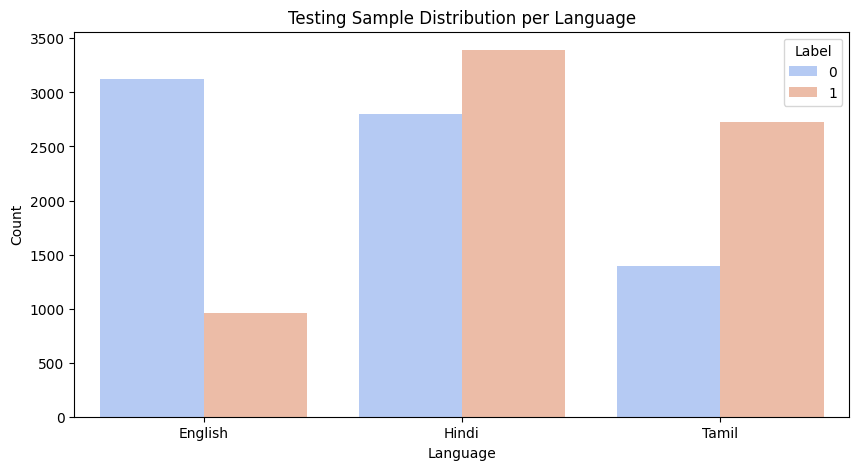

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary with language names and DataFrames
dfs = {'English': df_english_test, 'Hindi': df_hindi_test, 'Tamil': df_tamil_test}

# Count total samples per language and label distribution
for lang, df in dfs.items():
    print(f"\n{lang} Dataset: {len(df)} samples")
    print(df['Label'].value_counts())

# Concatenating all DataFrames using pd.concat()
df_all = pd.concat([
    df_english.assign(Language='English'),
    df_hindi.assign(Language='Hindi'),
    df_tamil.assign(Language='Tamil')
])

# Plot Label Distribution per Language
plt.figure(figsize=(10, 5))
sns.countplot(x="Language", hue="Label", data=df_all, palette="coolwarm")
plt.title("Testing Sample Distribution per Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()


In [119]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


In [125]:
# Merge all datasets into one
df_all = pd.concat([
    df_english,
    df_hindi,
    df_tamil
])

print(df_all.head(), "\nTotal Samples:", len(df_all))


                                                Text  Label
0     If this is "grilling" then wht wud u call t...      1
1  "In America, where the genuine Englishman no l...      0
2  "In the earlier decades the rallying cry of th...      0
3  "blank is blank culture/experience"  me litera...      0
4            "cannot even burn the effigy" LMAO 😂😂😂😂      0 
Total Samples: 14397


In [126]:
import re
import unicodedata

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)  # Replace emojis with an empty string

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Normalize Unicode characters (important for Hindi & Tamil)
    text = unicodedata.normalize("NFKC", text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", "", text)

    # Remove emojis
    text = remove_emojis(text)

    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\u0900-\u097F\u0B80-\u0BFF\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply cleaning to the dataset
df_all["Text"] = df_all["Text"].apply(clean_text)

# Show cleaned samples
print(df_all[["Text"]].head(10))


                                                Text
0  if this is grilling then wht wud u call th stu...
1  in america where the genuine englishman no lon...
2  in the earlier decades the rallying cry of the...
3  blank is blank cultureexperience me literally ...
4                   cannot even burn the effigy lmao
5  its because she insulted shippers not like you...
6  aliabhatt youre the biggest womanizer ranbirka...
7  arrestsonaliphogat what a shame handle replace...
8  arrestswatimaliwal boislockeroom feminismiscor...
9  bcci founders were sure 93 years ago that one ...


In [133]:
df_all.head()
df_train = df_all.copy()